# Met Office COVID-19 response dataset

This dataset is created, curated and updated for researchers looking to understand links between COVID-19 and environmental factors. 

For more information check out our [blog post](https://medium.com/informatics-lab/met-office-and-partners-offer-data-and-compute-platform-for-covid-19-researchers-83848ac55f5f) and the [data readme](https://metdatasa.blob.core.windows.net/covid19-response/README_data.html)

We are constantly updating the available data, [subscribe to our news group](https://groups.google.com/forum/#!forum/met-office-covid-19-data-and-platform-updates/join) to stay up to date or [contact us](mailto:covid19@informaticslab.co.uk) if you have any requests.

This Notebook offers some examples of how to interact with the data but if you need any help please contact covid19@informaticslab.co.uk.


## Imports and globals
Import the required modules, set up the default plot size and set some constants

In [1]:
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient, ContentSettings
from IPython.display import Markdown
import matplotlib.pyplot as plt 
%matplotlib inline 
import datetime
from collections import namedtuple
plt.rcParams['figure.figsize'] = (20.0, 10.0)

## Set up the blob client with the connection details

In [2]:
ACCOUNT_URL="https://metdatasa.blob.core.windows.net"
CONTAINER='covid19-response'

In [3]:
# Create the BlobServiceClient object which will be used to create a container client
blob_service_client = BlobServiceClient(ACCOUNT_URL)
container_client = blob_service_client.get_container_client(CONTAINER)

## Fetch the `README_data.md` and view

In [4]:
readme = container_client.get_blob_client('README_data.md').download_blob().readall().decode('utf-8')
Markdown(readme)

# Met Office COVID-19 response dataset

This data is for COVID-19 researchers to explore relationships between COVID-19 and environmental factors. [For more information see our blog post](https://medium.com/informatics-lab/met-office-and-partners-offer-data-and-platform-for-covid-19-researchers-83848ac55f5f). If your require compute resources to process this data [we might be able to help](https://medium.com/informatics-lab/met-office-and-partners-offer-data-and-platform-for-covid-19-researchers-83848ac55f5f).

## License

_Users are required to acknowledge the Met Office as the source of these data by including the following attribution statement in any resulting products, publications or applications: “Contains Met Office data licensed under the Open Government Licence v3.0”_

This data is made available under [Open Government License](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/).

## About the data

Global and high resolution UK [numerical weather model output](https://www.metoffice.gov.uk/research/approach/modelling-systems/unified-model/weather-forecasting) from the [UK Met Office](https://www.metoffice.gov.uk/). Data is from the very early time steps of the model following data assimilation, as such this data approximates a whole earth observation dataset.

The following variables are available:

- `t1o5m` = Air temperature at 1.5m in $K$
- `sh` = Specific humidity at 1.5m in $kg/kg$ (kg of water vapor in kg of air)
- `sw` = Short wave radiation in $W m^{-2}$ (surrogate for sunshine)
- `precip` = Precipitation flux in $kg m^{-2} s^{-1}$ (multiply by 3600 to get $mm / hr$ )
- `rain` = Rain flux in $kg m^{-2} s^{-1}$ (multiply by 3600 to get $mm / hr$)
- `pmsl` = Air pressure at mean sea level in $Pa$

This data is made available as NetCDF files.

Global and UK model data updated is available for 01 Jan - 12 Apr 2020 (inclusive).

There is some additional post processed data aggregations over COVID-19 reporting regions in the UK and USA made available as CSV files. More details below.

## Quick links

- [Announcement by the Met Office](https://medium.com/informatics-lab/met-office-and-partners-offer-data-and-compute-platform-for-covid-19-researchers-83848ac55f5f) making this data available in response to [RAMP](https://epcced.github.io/ramp/) initiative, asking for assistance in tackling to the COVID-19 pandemic.

- You can browse the data we have made available on Azure [here](index.html).

- This data is made available under [Open Government License](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/).

- More data is coming! Please subscribe to our [Google Groups mailing list](https://groups.google.com/forum/#!forum/met-office-covid-19-data-and-platform-updates/join) to receive updates when that data is available.

- Please contact us on [covid19@informaticslab.co.uk](mailto:covid19@informaticslab.co.uk) if you have any questions or requests for additional data.

## Data volumes, retention, update frequency and location

The data will be updated approximately weekly adding the previous week. We endeavour to have the previous week (Monday - Sunday) available by the following Tuesday.

As of 18/04/20 the dataset totals approximately 352G. 

It grows weekly by approximately 22G a week.

We intend retain and make this data available as long as we believe it's useful in planing the response to the COVID-19 pandemic.

The data is stored in the Azure region `East US 2`.

## Quick start

### Accessing the data

The data is hosted on Microsoft Azure through their AI for Earth initiative. You can access the data in many ways, such as:

#### Point and click

Open [the index file](https://metdatasa.blob.core.windows.net/covid19-response/index.html) in your browser. You will see a list of links to datafiles which you can download by clicking on them in your browser.

#### Azure Blob libraries

There is a range of libraries in a range of languages for working with Azure Blobs. See the [Azure Blob documentation for more info](https://docs.microsoft.com/en-us/azure/storage/blobs/storage-blobs-overview).

#### Automated downloading with AZCopy

There are lots of files, so we suggest installing `azcopy` command line tool, which you can download [here](https://docs.microsoft.com/en-us/azure/storage/common/storage-use-azcopy-v10#download-azcopy). This lets you download [whole directories](https://docs.microsoft.com/en-us/azure/storage/common/storage-use-azcopy-blobs?toc=/azure/storage/blobs/toc.json#download-the-contents-of-a-directory) or multiple files [using wildcards](https://docs.microsoft.com/en-us/azure/storage/common/storage-use-azcopy-blobs?toc=/azure/storage/blobs/toc.json#use-wildcard-characters-1) to your computer of choice. <br>
For example: <br>
1. `azcopy cp https://metdatasa.blob.core.windows.net/covid19-response/metoffice_global_daily/precip_max/global_daily_precip_max_20200101.nc .`<br>
will download the file `global_daily_precip_max_20200101.nc` to the current directory.
2. `azcopy cp 'https://metdatasa.blob.core.windows.net/covid19-response/metoffice_ukv_daily/snow_mean/*' ukv_daily_snow_mean/`<br>
will download the contents of `/metoffice_ukv_daily/snow_mean/` to `ukv_daily_snow_mean/`.
3. `azcopy cp  --recursive  --include-pattern 'us_55*.csv' https://metdatasa.blob.core.windows.net/covid19-response/regional_subset_data/us_data/ .`<br>
will download all the US state county averaged meteorology data which match the pattern `us_55*.csv`.

## How the data is organised

- `metoffice_global_daily/`<br>
Contains the Met Office daily global gridded data files.<br>
Each file has a descriptive name* as `global_daily_{variable}_{statistic}_{YYYYMMDD}.nc`.
  - `.../t1o5m_mean/` = Daily mean air temperature files
  - `.../t1o5m_max/` = Daily max air temperature files
  - `.../t1o5m_min/` = Daily min air temperature files
  - `.../sh_mean/` = Daily mean Specific Humidity files
  - `.../sh_max/` = Daily max Specific Humidity files
  - `.../sh_min/` = Daily min Specific Humidity files
  - `.../sw_mean/` = Daily mean for short wave radiation files
  - `.../sw_max/` = Daily max for short wave radiation files
  - `.../precip_mean/` = Daily mean precipitation flux files
  - `.../precip_max/` = Daily max precipitation flux files

- `metoffice_global_hourly/`<br>
Contains the Met Office hourly global gridded data files.<br>
Each file has a descriptive name* as `global_hourly_{variable}_global_{YYYYMMDD}.nc`.
  - `.../t1o5m/` = Hourly air temperature files
  - `.../sh/` = Hourly Specific Humidity files
  - `.../sw/` = Hourly for short wave radiation files
  - `.../precip/` = Hourly precipitation flux files
  - `.../precip3hr/` = Three hourly precipitation flux files
  - `.../pmsl/` = Hourly air pressure at mean sea level files

- `metoffice_ukv_daily/`<br>
Contains the Met Office daily UKV gridded data files.<br>
Each file has a descriptive name* as `ukv_daily_{variable}_{statistic}_{YYYYMMDD}.nc`.
  - `.../t1o5m_mean/` = Daily mean air temperature files
  - `.../t1o5m_max/` = Daily max air temperature files
  - `.../t1o5m_min/` = Daily min air temperature files
  - `.../sh_mean/` = Daily mean Specific Humidity files
  - `.../sh_max/` = Daily max Specific Humidity files
  - `.../sh_min/` = Daily min Specific Humidity files
  - `.../sw_mean/` = Daily mean for short wave radiation files
  - `.../sw_max/` = Daily max for short wave radiation files

- `metoffice_ukv_hourly/`<br>
Contains the Met Office hourly UKV gridded data files.<br>
Each file has a descriptive name* as `ukv_hourly_{variable}_{YYYYMMDD}.nc`.
  - `.../t1o5m_ukv/` = Hourly air temperature files
  - `.../sh_ukv/` = Hourly Specific Humidity files
  - `.../sw_ukv/` = Hourly for short wave radiation files
  - `.../pmsl_ukv/` = Hourly air pressure at mean sea level files

- `regional_subset_data/`<br>
Contains processed regional daily values for UK and USA as `.csv` files.<br>
Files were processed by subsetting the gridded Met Office global daily files using shapefiles for each region, taking the latitude-longitude mean value for each variable in each region for each date and saving those values as a table in a `.csv` file*.
  - `.../uk_daily_meteodata_2020jan-mar_v03.csv` <br>
    Daily values for `t1o5m`, `sh`, `sw` and `precip` for **all** reporting regions in the UK. <br>
    (Merging together of all files in `/uk_data/` and `/uk_data_precip`)
  - `.../us_daily_meteodata_2020jan-mar_v03.csv`<br>
    Daily values for `t1o5m`, `sh`, `sw` and `precip` for **all** counties in the USA. <br>
    (Merging together of all files in `/us_data/` and `/us_data_precip`)
  - `.../uk_data/`<br> 
    Daily values for `t1o5m`, `sh` and `sw` for **each** reporting region in the UK. (One `.csv` file per region.)
  - `.../uk_data_precip/`<br> 
    Daily values for `precip` for **each** reporting region in the UK. (One `.csv` file per region.)
  - `.../us_data/`<br>
    Daily values for `t1o5m`, `sh` and `sw` for **each** county in the USA. (One `.csv` file per county.)
  - `.../us_data_precip/`<br>
    Daily values for `precip` for **each** county in the USA. (One `.csv` file per county.)

- `shapefiles/`<br>
Contains shapefiles for UK, USA, Italy, Uganda and Vietnam.
  - `.../UK/` = UK COVID-19 reporting regions
  - `.../USA/` = USA state counties
  - `.../Italy/` =
  - `.../Uganda/` =
  - `.../Vietnam/` =

_*Where possible, filenames are as described. However, given the short timeframes in which this data has been made available, minor variations in filename descriptions may occur. Filenames should still be accurately descriptive of the data. If you find issues with any filenames, or the data itself, please contact us on [covid19@informaticslab.co.uk](mailto:covid19@informaticslab.co.uk)_

## Getting help and contact

For help or additional data requests please contact us on [covid19@informaticslab.co.uk](mailto:covid19@informaticslab.co.uk).

<br ><br ><br >

## List the files under `metoffice_global_daily/t1o5m_max`

In [5]:
for blob in container_client.list_blobs(name_starts_with='metoffice_global_daily/t1o5m_max'):
    print(f"* {blob.name}")

* metoffice_global_daily/t1o5m_max/global_daily_t1o5m_max_20200101.nc
* metoffice_global_daily/t1o5m_max/global_daily_t1o5m_max_20200102.nc
* metoffice_global_daily/t1o5m_max/global_daily_t1o5m_max_20200103.nc
* metoffice_global_daily/t1o5m_max/global_daily_t1o5m_max_20200104.nc
* metoffice_global_daily/t1o5m_max/global_daily_t1o5m_max_20200105.nc
* metoffice_global_daily/t1o5m_max/global_daily_t1o5m_max_20200106.nc
* metoffice_global_daily/t1o5m_max/global_daily_t1o5m_max_20200107.nc
* metoffice_global_daily/t1o5m_max/global_daily_t1o5m_max_20200108.nc
* metoffice_global_daily/t1o5m_max/global_daily_t1o5m_max_20200109.nc
* metoffice_global_daily/t1o5m_max/global_daily_t1o5m_max_20200110.nc
* metoffice_global_daily/t1o5m_max/global_daily_t1o5m_max_20200111.nc
* metoffice_global_daily/t1o5m_max/global_daily_t1o5m_max_20200112.nc
* metoffice_global_daily/t1o5m_max/global_daily_t1o5m_max_20200113.nc
* metoffice_global_daily/t1o5m_max/global_daily_t1o5m_max_20200114.nc
* metoffice_global_d

## Get a particular file based on the data required

The filenames are predictable, if you know what data you want you can download that file

In [6]:
DATA_END = (datetime.datetime.now() - datetime.timedelta(days=9)).date()
DATA_START = datetime.date(2020,1,1)

def url_from_propertys(model, param, freq, stat=None, day=None, hour=None):
    assert model in ["global","ukv"]
    assert param in ["rain", "sh", "snow", "t1o5m", "pmsl","precip","sw"]
    assert freq in ["daily","hourly"]
    if freq == 'daily':
        assert stat in ['max', 'min', 'mean']
    else:
        assert stat is None  
    assert DATA_START <= day <= DATA_END
    
    stat = '_'+stat if stat else ''

    filepath = f'metoffice_{model}_{freq}/{param}{stat}/{model}_{freq}_{param}{stat}_{day:%Y%m%d}.nc'
    return f"{ACCOUNT_URL}/{CONTAINER}/{filepath}"


Properties = namedtuple('Properties',["model","param","freq","stat","day"])

In [7]:

files = [
    Properties("global","precip","daily","mean",datetime.date(2020,3,3)),
    Properties("ukv","t1o5m","daily","min",datetime.date(2020,4,1)),
    Properties("ukv","snow","hourly",None,datetime.date(2020,2,2)),
]

for file in files:
    path = url_from_propertys(*file)
    print(path)

https://metdatasa.blob.core.windows.net/covid19-response/metoffice_global_daily/precip_mean/global_daily_precip_mean_20200303.nc
https://metdatasa.blob.core.windows.net/covid19-response/metoffice_ukv_daily/t1o5m_min/ukv_daily_t1o5m_min_20200401.nc
https://metdatasa.blob.core.windows.net/covid19-response/metoffice_ukv_hourly/snow/ukv_hourly_snow_20200202.nc


## xarray or Iris are useful tools for interacting with this sort of data

In [8]:
import xarray as xr
from io import BytesIO
import iris

Stream blob into memory and load dataset in xarray

In [9]:
data_description = Properties("global","precip","daily","mean",datetime.date(2020,1,30))
file_data = BytesIO(BlobClient.from_blob_url(url_from_propertys(*data_description)).download_blob().readall())
ds = xr.open_dataset(file_data)
ds

<xarray.Dataset>
Dimensions:                       (bnds: 2, latitude: 1920, longitude: 2560)
Coordinates:
  * latitude                      (latitude) float32 -89.953125 ... 89.953125
  * longitude                     (longitude) float32 0.0703125 ... 359.9297
    forecast_period               timedelta64[ns] ...
    forecast_reference_time       datetime64[ns] ...
    time                          datetime64[ns] ...
Dimensions without coordinates: bnds
Data variables:
    precipitation_flux            (latitude, longitude) float32 ...
    latitude_longitude            int32 ...
    forecast_period_bnds          (bnds) float64 ...
    forecast_reference_time_bnds  (bnds) datetime64[ns] ...
    time_bnds                     (bnds) datetime64[ns] ...
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   11.2
    Conventions:  CF-1.5

Plot it

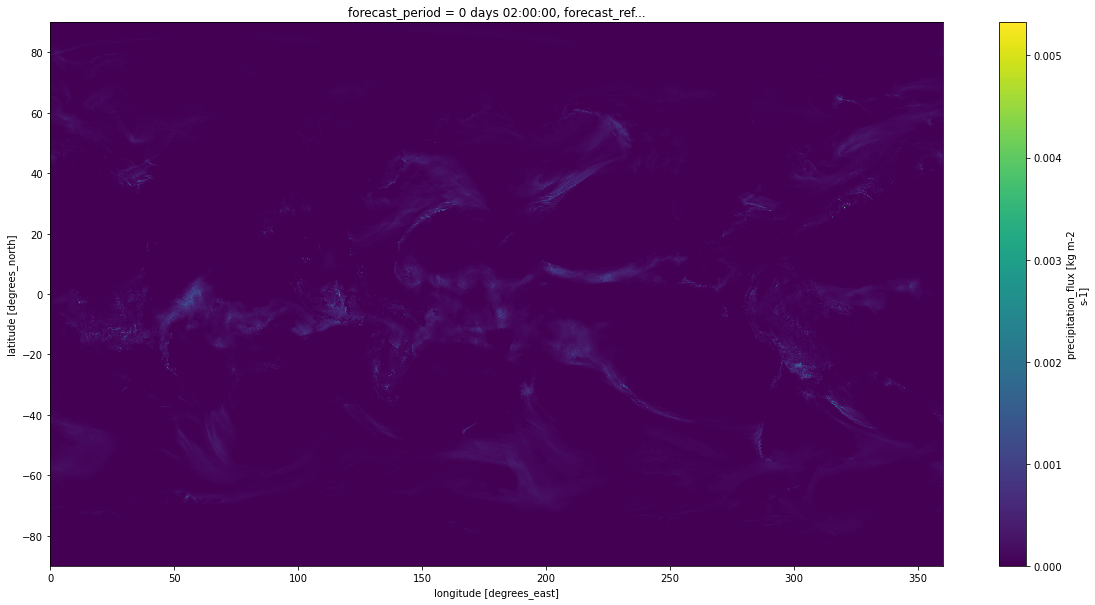

In [10]:
ds.precipitation_flux.plot()

With Iris. Use a temporary file as Iris can not read files from memory.

In [11]:
import tempfile


In [13]:
tmp = tempfile.NamedTemporaryFile(delete=False)
data_description = Properties("ukv","sw","hourly",None,datetime.date(2020,1,30))
tmp.write(BlobClient.from_blob_url(url_from_propertys(*data_description)).download_blob().readall())
local_path = tmp.name
tmp.close()

In [14]:
sw = iris.load_cube(local_path)
sw

<iris 'Cube' of m01s01i202 / (1) (forecast_period: 6; forecast_reference_time: 4; grid_latitude: 808; grid_longitude: 621)>